In [61]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Importing the dataset
train=pd.read_csv("titanic_train.csv")
test=pd.read_csv("titanic_test.csv")

In [63]:
# shape
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [66]:
# previewing the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:

# Few conclusions

# 1. Missing values in Age, Cabin and Embarked columns
# 2. More than 70 percent values are missing in cabin columns, will have to drop
# 3. Few columns have inappropriate data types

In [69]:
# Dropping cabin column
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [70]:
# finding the most appeared value in embarked column
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
# Imputing missing values for embarked
train['Embarked'].fillna('S',inplace=True)

In [72]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [73]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [74]:
def age_fillup(cols):
    Pclass = cols[1]
    age = cols[0]

    if pd.isnull(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        elif Pclass == 3:
            return 25
        else:
            return 30
    else:
        return age

In [75]:
Age = train[['Age', 'Pclass']].apply(age_fillup, axis=1)

In [76]:
train['Age'][np.isnan(train['Age'])]=Age

<ipython-input-76-f06cbe17b9db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][np.isnan(train['Age'])]=Age


In [77]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [78]:
Age1=test[['Age', 'Pclass']].apply(age_fillup, axis=1)

In [79]:
test['Age'][np.isnan(test['Age'])]=Age1

<ipython-input-79-e0b316b071bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][np.isnan(test['Age'])]=Age1


In [80]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [81]:
#EDA

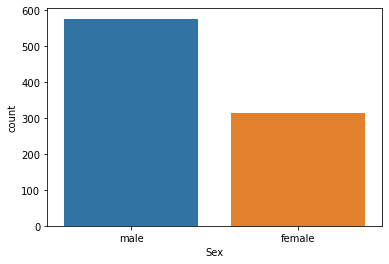

In [82]:
sns.countplot(train['Sex'])

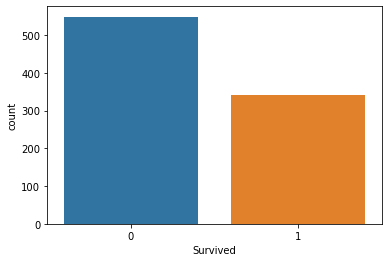

In [83]:
sns.countplot(train['Survived'])

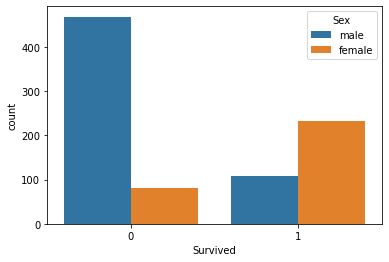

In [84]:
#Survival chance acc to Sex
sns.countplot('Survived' , hue='Sex' ,   data=train)

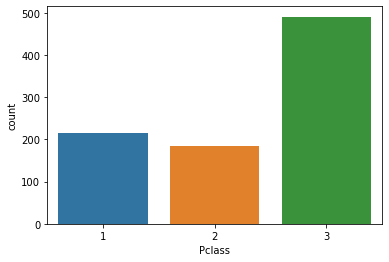

In [85]:
sns.countplot(train['Pclass'])

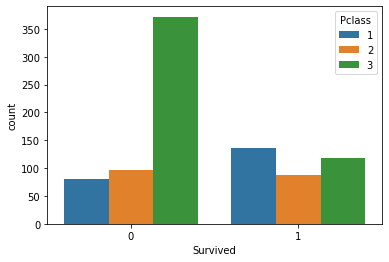

In [86]:
#Survival chance acc to Pclass 
sns.countplot('Survived' , hue='Pclass' ,  data=train )

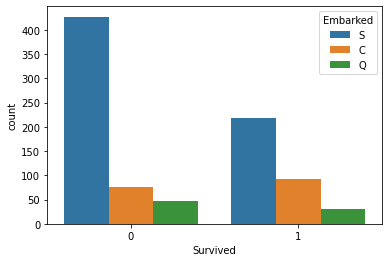

In [87]:
sns.countplot('Survived' , hue='Embarked' ,  data=train )

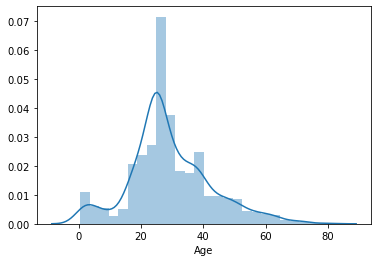

In [88]:
sns.distplot(train['Age'])

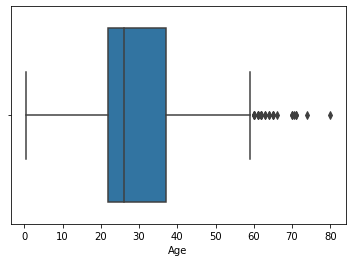

In [89]:
sns.boxplot(train['Age'])

In [90]:
train[train['Age']>75]['Survived'].value_counts()

1    1
Name: Survived, dtype: int64

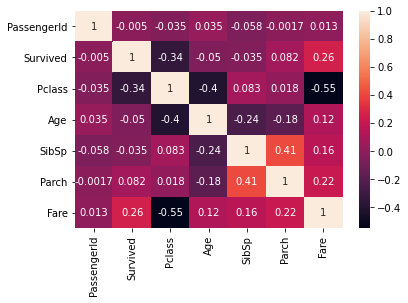

In [91]:
sns.heatmap(train.corr(),annot=True)

In [92]:
train.drop(columns=['Name','Ticket'],inplace=True)
test.drop(columns=['Name','Ticket'],inplace=True)

In [93]:

# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

In [94]:
train['family']=train['SibSp'] + train['Parch'] + 1
test['family']=test['SibSp'] + test['Parch'] + 1

In [95]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [96]:
train[['family','Survived']].groupby('family').mean()

,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [97]:
# Now we will enginner a new feature by the name of family type


In [98]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [99]:
train['family_size']=train['family'].apply(family_size)
test['family_size']=test['family'].apply(family_size)

In [100]:
train.drop(columns=['family'],inplace=True)
test.drop(columns=['family'],inplace=True)

In [101]:
passenger_id=test['PassengerId'].values

In [102]:
train.drop(columns=['PassengerId'],inplace=True)
test.drop(columns=['PassengerId'],inplace=True)

In [103]:
test.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [104]:
# One hot encoding
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [105]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [106]:
train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Small
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,0,1,0,1
4,0,35.0,8.0500,0,1,1,0,1,0,0


In [107]:
test.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Small
0,34.5,7.8292,0,1,1,1,0,0,0
1,47.0,7.0000,0,1,0,0,1,0,1
2,62.0,9.6875,1,0,1,1,0,0,0
3,27.0,8.6625,0,1,1,0,1,0,0
4,22.0,12.2875,0,1,0,0,1,0,1


In [108]:
X=train.iloc[:,1:].values 

In [109]:
y=train.iloc[:,0].values

In [110]:
#train test split

from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [112]:

#Decision Tree Method

In [113]:
#Train the model
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [114]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [115]:
y_pred=clf.predict(X_test)

In [116]:

#Accuracy calculate

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7486033519553073